This is code of SIFT being sent to CNN to affect the model directly, instead of indirectly through dropping images that don't meet the SIFT criteria.

Phase 1: Loading labels
Number of labels: 63445
Phase 1 completed in 0.00 seconds
Phase 2: Loading image paths
Number of image paths: 63445
Phase 2 completed in 0.00 seconds
Phase 3: Randomly selecting 1% of data
Sample size: 634
Sample indices size: 634
Sample paths size: 634
Sample labels size: 634
Phase 3 completed in 0.00 seconds
Phase 4: Preprocessing images and extracting SIFT features
Unique label values before saving: [0 1 2 3 4 5]
Saved preprocessed images, labels, and SIFT features to disk.
Phase 4 completed in 1163.86 seconds
Valid images size: 301
Valid labels size: 301
Unique label values after loading from disk: [0 1 2 3 4 5]


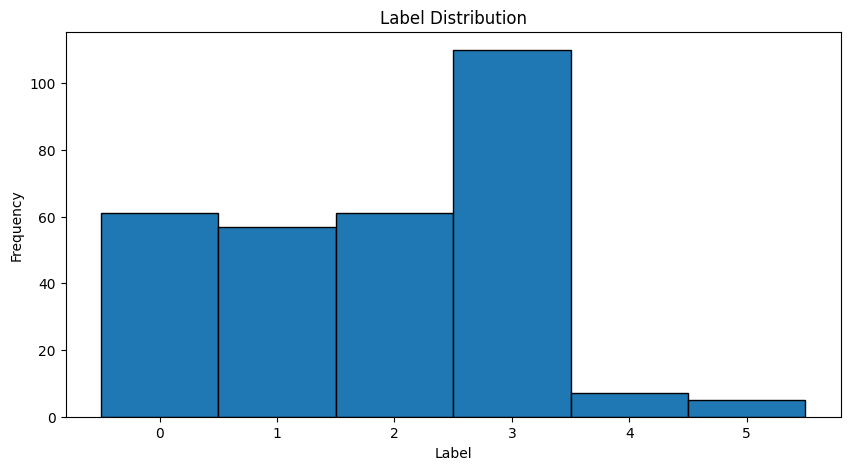

Phase 4 completed in 1163.93 seconds
Phase 5: Splitting data into training and validation sets
Phase 5 completed in 0.01 seconds
Unique training labels: [0 1 2 3 4 5]
Unique validation labels: [0 1 2 3 4 5]
Phase 6: Building CNN model
Phase 6 completed in 0.06 seconds
Phase 7: Training CNN model
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.2486 - loss: 5.3033 - val_accuracy: 0.1803 - val_loss: 3.0026
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2068 - loss: 2.6496 - val_accuracy: 0.1967 - val_loss: 2.5694
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2995 - loss: 1.8358 - val_accuracy: 0.2951 - val_loss: 1.9245
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3226 - loss: 1.7450 - val_accuracy: 0.3443 - val_loss: 2.0243
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.2903 - loss: 1.5364 - val_accuracy: 0.3115 - val_loss: 1.7180
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4301 - loss: 1.3834 - val_accuracy: 0.2131 - val_loss: 1.7210
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4164 - loss: 1.3333 - val_accuracy: 0.2951 - val_loss: 1.6705
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4299 - loss: 1.3772 - val_accuracy: 0.3279 - val_loss: 1.7694
Epoch 9/10

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
import os
import random
import cv2  # Import OpenCV with SIFT support
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report  # Import classification_report
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# Description:
# This script performs supervised learning for classifying biological cell images. It starts by loading labels from a MATLAB file and image paths from a text file. It then randomly selects 1% of the data for processing if preprocessed data is not already saved. The images are preprocessed by resizing to 128x128 pixels, scaling, and adding a channel dimension. SIFT features are extracted from the images. The data is split into training and validation sets. A Convolutional Neural Network (CNN) is built and trained on the training set, and its performance is evaluated on the validation set. The script includes error handling for missing images and prints messages indicating the current phase of processing, along with timers to measure the time taken for each phase. Intermediate results are saved to disk to speed up future runs.

# Check if preprocessed images and labels are already saved
if os.path.exists('preprocessed_images.npy') and os.path.exists('valid_labels.npy') and os.path.exists('sift_features.npy'):
    print("Loading preprocessed images, labels, and SIFT features from disk.")
    images = np.load('preprocessed_images.npy')
    valid_labels = np.load('valid_labels.npy')
    sift_features = np.load('sift_features.npy', allow_pickle=True)
    print(f"Loaded preprocessed images, labels, and SIFT features from disk.")
else:
    # 1. Load labels
    print("Phase 1: Loading labels")
    start_time = time.time()
    labels = loadmat('labels.mat')['labels'].flatten()  # Ensure labels are flattened
    print(f"Number of labels: {len(labels)}")
    print(f"Phase 1 completed in {time.time() - start_time:.2f} seconds")

    # Adjust labels to be 0-indexed (i.e., from 0 to 5)
    labels = labels - 1

    # 2. Load images
    print("Phase 2: Loading image paths")
    start_time = time.time()
    with open('cells2.txt', 'r') as f:
        image_paths = [line.strip() for line in f.readlines()]
    print(f"Number of image paths: {len(image_paths)}")
    print(f"Phase 2 completed in {time.time() - start_time:.2f} seconds")

    # Ensure the number of labels matches the number of image paths
    assert len(labels) == len(image_paths), "Number of labels does not match number of image paths"

    # 3. Randomly select 1% of data
    print("Phase 3: Randomly selecting 1% of data")
    start_time = time.time()
    sample_size = int(0.01 * len(image_paths))
    sample_indices = random.sample(range(len(image_paths)), sample_size)
    sample_paths = [image_paths[i] for i in sample_indices]
    sample_labels = labels[sample_indices]
    print(f"Sample size: {sample_size}")
    print(f"Sample indices size: {len(sample_indices)}")
    print(f"Sample paths size: {len(sample_paths)}")
    print(f"Sample labels size: {len(sample_labels)}")
    print(f"Phase 3 completed in {time.time() - start_time:.2f} seconds")

    # 4. Preprocess images and extract SIFT features
    print("Phase 4: Preprocessing images and extracting SIFT features")
    start_time = time.time()
    sift = cv2.SIFT_create()  # Create SIFT object

    def preprocess_image_and_extract_sift(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Image at path {path} could not be loaded.")
            return None, None
        img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128 pixels
        keypoints, descriptors = sift.detectAndCompute(img_resized, None)  # Extract SIFT features
        img_resized = img_resized / 255.0  # Scaling
        img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
        return img_resized, descriptors

    images = []
    valid_labels = []
    sift_features = []
    for path, label in zip(sample_paths, sample_labels):
        img, descriptors = preprocess_image_and_extract_sift(path)
        if img is not None and descriptors is not None:
            images.append(img)
            valid_labels.append(label)
            sift_features.append(descriptors)

    # Debug: Print unique label values before saving
    print(f"Unique label values before saving: {np.unique(valid_labels)}")

    images = np.array(images)
    valid_labels = np.array(valid_labels)
    sift_features = np.array(sift_features, dtype=object)  # Save SIFT features
    np.save('preprocessed_images.npy', images)
    np.save('valid_labels.npy', valid_labels)
    np.save('sift_features.npy', sift_features)
    print("Saved preprocessed images, labels, and SIFT features to disk.")
    print(f"Phase 4 completed in {time.time() - start_time:.2f} seconds")

# Debug: Check the sizes of valid images and labels
print(f"Valid images size: {len(images)}")
print(f"Valid labels size: {len(valid_labels)}")

# Debug: Print unique label values after loading from disk
print(f"Unique label values after loading from disk: {np.unique(valid_labels)}")

# Visualize label distribution after loading or preprocessing
plt.figure(figsize=(10, 5))
plt.hist(valid_labels, bins=np.arange(7) - 0.5, edgecolor='black')
plt.xticks(range(6))
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()

# Ensure there are valid images before splitting
if len(images) == 0:
    raise ValueError("No valid images were loaded. Please check the image paths and preprocessing steps.")

print(f"Phase 4 completed in {time.time() - start_time:.2f} seconds")

# 5. Split data
print("Phase 5: Splitting data into training and validation sets")
start_time = time.time()
X_train, X_val, y_train, y_val = train_test_split(images, valid_labels, test_size=0.2, stratify=valid_labels)
print(f"Phase 5 completed in {time.time() - start_time:.2f} seconds")

# Debug: Print unique label values after splitting
print(f"Unique training labels: {np.unique(y_train)}")
print(f"Unique validation labels: {np.unique(y_val)}")

# Ensure no label value is outside the valid range [0, 5]
assert np.all(y_train >= 0) and np.all(y_train <= 5), "Training labels contain values outside the range [0, 5]"
assert np.all(y_val >= 0) and np.all(y_val <= 5), "Validation labels contain values outside the range [0, 5]"

# Phase 6: Build CNN Model
print("Phase 6: Building CNN model")
start_time = time.time()

# Define the CNN model with an additional input for SIFT features
image_input = tf.keras.layers.Input(shape=(128, 128, 1))
sift_input = tf.keras.layers.Input(shape=(128,))  # Assuming 128-dimensional SIFT features

# CNN layers for image input
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(image_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

# Combine CNN output with SIFT features
combined = tf.keras.layers.Concatenate()([x, sift_input])
combined = tf.keras.layers.Dense(128, activation='relu')(combined)
output = tf.keras.layers.Dense(6, activation='softmax')(combined)

# Create the model
model = tf.keras.models.Model(inputs=[image_input, sift_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(f"Phase 6 completed in {time.time() - start_time:.2f} seconds")

# 7. Train model
print("Phase 7: Training CNN model")
start_time = time.time()

# Prepare SIFT features for training
sift_train = np.array([np.mean(descriptors, axis=0) if descriptors is not None else np.zeros(128) for descriptors in sift_features[:len(X_train)]])
sift_val = np.array([np.mean(descriptors, axis=0) if descriptors is not None else np.zeros(128) for descriptors in sift_features[len(X_train):]])

model.fit([X_train, sift_train], y_train, epochs=10, validation_data=([X_val, sift_val], y_val))
print(f"Phase 7 completed in {time.time() - start_time:.2f} seconds")

# 8. Evaluate model
print("Phase 8: Evaluating model")
start_time = time.time()
metrics = model.evaluate([X_val, sift_val], y_val)
print(f"Validation Accuracy: {metrics[1]}")
print(f"Phase 8 completed in {time.time() - start_time:.2f} seconds")

# Compute and print classification metrics
y_pred = np.argmax(model.predict([X_val, sift_val]), axis=1)
print("Classification Report:")
report = classification_report(y_val, y_pred, target_names=[str(i) for i in range(6)], output_dict=True)
print(report)

# Print detailed classification report
print("Detailed Classification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"Class {label}:")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")
        print(f"  Support: {metrics['support']}")